## Table of Content
 **[Capstone 1 Project:Supervised Machine Learning](#Capstone-1-Project-:-Supervised-Machine-Learning)**
 
  <p>This dataset contains employee information, including their demographics, job role, job satisfaction, work-life balance, and whether they have left the company (attrition).  </p>
 <p>The focus of the task is to build predictive models which can identify which employees are at a higher risk of leaving the company. This could help in taking some proactive measures to retain valuable employees. This dataset is collected for a Human resource application and the source is from Kaggle: https://www.kaggle.com/datasets/itssuru/hr-employee-attrition  
    
    Attrition: Represents the measure of employees leaving a company voluntarily or involuntarily. HR uses the figure to track and understand how things are going at a company


##  Load Code Libraries

In [153]:
import kaggle
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [154]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Define project directory and data path
project_dir = os.path.join(os.getcwd(), "data")
os.makedirs(project_dir, exist_ok=True)

# Kaggle dataset identifier (update with correct dataset ID)
dataset_name = "itssuru/HR-Employee-Attrition"

# Download dataset to the project data directory
api.dataset_download_files(dataset_name, path=project_dir, unzip=True)

print(f"Dataset downloaded and extracted to {project_dir}")


Dataset URL: https://www.kaggle.com/datasets/itssuru/HR-Employee-Attrition
Dataset downloaded and extracted to D:\mlzoomcamp2024\capstone1Project\data


In [155]:
!ls


app.py
attrition-final.py
data
Dockerfile
notebook.ipynb
notebooks
Pipfile
Pipfile.lock
predict_test.ipynb
README.md


In [156]:
hr = r'D:/mlzoomcamp2024/capstone1Project/data/HR-Employee-Attrition.csv'
df = pd.read_csv(hr)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


###  Load Dataset Summary
* Define the HR Attrition and understand the role of the dataset.
* The dataset contains employee information, including their demographics, job role, job satisfaction, work-life balance, and whether they have left the company (attrition). 
* Consists of 35 Columns and 1470 rows.

## Data Pre-Processing

### Standardised 
### Understand the Dataset
* Review the columns and data types
* Check the shape of the dataset
* Display the first few rows and the last few rows
### Summary Statistics
Gain an overview of the dataset's distributions and summary statistics.
* View summary statistics for numerical features
* For categorical columns, use df['column_name'].value_counts() to see the distribution of categories.
### Check for Missing Values
 Identify incomplete data
* Check and find the missing values
* Visualize missing data patterns with a heatmap using seaborn (sns.heatmap(df.isnull(), cbar=False))
### Identify Duplicates
Detect duplicate rows that may affect the analysis
* Check for Duplicates, and 
* Check for outliers in the dataset. 
* Finally, address any data quality issues.

In [157]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [158]:
df.info() # Review the columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [159]:
df.shape #Check the shape of the dataset

(1470, 35)

In [160]:
df.head() # Display the first few rows

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,1,life_sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,2,other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,4,life_sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,1,medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [161]:
df.tail() # Display the last few rows

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1465,36,no,travel_frequently,884,research_&_development,23,2,medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,no,travel_rarely,613,research_&_development,6,1,medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,no,travel_rarely,155,research_&_development,4,3,life_sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,no,travel_frequently,1023,sales,2,3,medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,no,travel_rarely,628,research_&_development,8,3,medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [162]:
# Summary statistics
df.describe().round(3) # View summary statistics for numerical features

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000,1470.000,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,...,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.0,1024.865,2.722,65.891,2.730,2.064,...,2.712,80.0,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.0,602.024,1.093,20.329,0.712,1.107,...,1.081,0.0,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.0,1.000,1.000,30.000,1.000,1.000,...,1.000,80.0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.0,491.250,2.000,48.000,2.000,1.000,...,2.000,80.0,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.0,1020.500,3.000,66.000,3.000,2.000,...,3.000,80.0,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.0,1555.750,4.000,83.750,3.000,3.000,...,4.000,80.0,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.0,2068.000,4.000,100.000,4.000,5.000,...,4.000,80.0,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [163]:
# View the distribution of Categories
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# num_cols = df.select_dtypes(include=['number']).columns.tolist()
# num_cols.remove('attrition')  # Remove target variable from numeric columns
# df[cat_cols].value_counts()
cat_cols

['attrition',
 'businesstravel',
 'department',
 'educationfield',
 'gender',
 'jobrole',
 'maritalstatus',
 'over18',
 'overtime']

In [164]:
df[cat_cols].value_counts()

attrition  businesstravel  department              educationfield  gender  jobrole                    maritalstatus  over18  overtime
no         travel_rarely   research_&_development  life_sciences   male    research_scientist         married        y       no          19
                                                   medical         male    laboratory_technician      married        y       no          17
                           sales                   marketing       male    sales_executive            married        y       no          15
                           research_&_development  life_sciences   male    laboratory_technician      married        y       no          15
                                                                           research_scientist         single         y       no          14
                                                                                                                                         ..
yes        travel_rarely  

In [165]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
attrition,yes,no,yes,no,no,no,no,no,no,no,...,no,yes,no,no,no,no,no,no,no,no
businesstravel,travel_rarely,travel_frequently,travel_rarely,travel_frequently,travel_rarely,travel_frequently,travel_rarely,travel_rarely,travel_frequently,travel_rarely,...,travel_rarely,travel_rarely,travel_rarely,non-travel,travel_rarely,travel_frequently,travel_rarely,travel_rarely,travel_frequently,travel_rarely
dailyrate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
department,sales,research_&_development,research_&_development,research_&_development,research_&_development,research_&_development,research_&_development,research_&_development,research_&_development,research_&_development,...,research_&_development,sales,sales,research_&_development,sales,research_&_development,research_&_development,research_&_development,sales,research_&_development
distancefromhome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
educationfield,life_sciences,life_sciences,other,life_sciences,medical,life_sciences,medical,life_sciences,life_sciences,medical,...,medical,marketing,marketing,medical,other,medical,medical,life_sciences,medical,medical
employeecount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
employeenumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [166]:
df.columns # Examining all the columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [167]:
df.dtypes

age                          int64
attrition                   object
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears   

In [168]:
# Identify incomplete data
print(df.isnull().sum()) # Check and find the Missing Values in each column

# if missing value for a column greater than 0, try this to visualize 
# sns.heatmap(df.isnull(), cbar=False)

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [169]:
# Detect duplicate rows that may affect analysis
df.duplicated().sum() # find the number of duplicate rows

# If duplicates are found use the below to remove
# df.drop_duplicates(inplace=True)

np.int64(0)

In [170]:
drop_col = df[['employeecount', 'over18','standardhours']]
drop_col

,employeecount,over18,standardhours
0,1,y,80
1,1,y,80
2,1,y,80
3,1,y,80
4,1,y,80
...,...,...,...
1465,1,y,80
1466,1,y,80
1467,1,y,80
1468,1,y,80


* Drop all constant attributes (1 from the result about) that will not make a difference to our model description

In [171]:
df.drop(columns=drop_col,axis=1,inplace=True)
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,1,life_sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,2,other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,4,life_sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,1,medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,no,travel_frequently,884,research_&_development,23,2,medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,no,travel_rarely,613,research_&_development,6,1,medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,no,travel_rarely,155,research_&_development,4,3,life_sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,no,travel_frequently,1023,sales,2,3,medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [172]:
df.attrition = (df.attrition == 'yes').astype(int) # Convert the target variable "Attrition" to 1 or 0 to represent Yes or No.
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,travel_rarely,1102,sales,1,2,life_sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,travel_frequently,279,research_&_development,8,1,life_sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,travel_rarely,1373,research_&_development,2,2,other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,travel_frequently,1392,research_&_development,3,4,life_sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,travel_rarely,591,research_&_development,2,1,medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,travel_frequently,884,research_&_development,23,2,medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,travel_rarely,613,research_&_development,6,1,medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,travel_rarely,155,research_&_development,4,3,life_sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,travel_frequently,1023,sales,2,3,medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [173]:
df.nunique()

age                           43
attrition                      2
businesstravel                 3
dailyrate                    886
department                     3
distancefromhome              29
education                      5
educationfield                 6
employeenumber              1470
environmentsatisfaction        4
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1349
monthlyrate                 1427
numcompaniesworked            10
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifebalance                4
yearsatcompany                37
yearsincurrentrole            19
yearssince

In [174]:
# For each column, let's look at first 5 unique values and total number of unique values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[41 49 37 33 27]
43

attrition
[1 0]
2

businesstravel
['travel_rarely' 'travel_frequently' 'non-travel']
3

dailyrate
[1102  279 1373 1392  591]
886

department
['sales' 'research_&_development' 'human_resources']
3

distancefromhome
[ 1  8  2  3 24]
29

education
[2 1 4 3 5]
5

educationfield
['life_sciences' 'other' 'medical' 'marketing' 'technical_degree']
6

employeenumber
[1 2 4 5 7]
1470

environmentsatisfaction
[2 3 4 1]
4

gender
['female' 'male']
2

hourlyrate
[94 61 92 56 40]
71

jobinvolvement
[3 2 4 1]
4

joblevel
[2 1 3 4 5]
5

jobrole
['sales_executive' 'research_scientist' 'laboratory_technician'
 'manufacturing_director' 'healthcare_representative']
9

jobsatisfaction
[4 2 3 1]
4

maritalstatus
['single' 'married' 'divorced']
3

monthlyincome
[5993 5130 2090 2909 3468]
1349

monthlyrate
[19479 24907  2396 23159 16632]
1427

numcompaniesworked
[8 1 6 9 0]
10

overtime
['yes' 'no']
2

percentsalaryhike
[11 23 15 12 13]
15

performancerating
[3 4]
2

relationshipsatis

## Validation Framework
* Perform the train/validation/test split with Scikit-Learn
* 60/20/20 split
* Scaling
* Handling Class Imbalance

In [175]:
from sklearn.model_selection import train_test_split

# Set random seed
SEED = 42

In [176]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)

In [177]:
len(df_train), len(df_val), len(df_test), len(df_train_full)

(882, 294, 294, 1176)

In [178]:
df_train

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1454,45,0,travel_rarely,374,sales,20,3,life_sciences,2046,4,...,3,3,0,8,3,3,5,3,0,1
1170,27,0,travel_frequently,591,research_&_development,2,3,medical,1648,4,...,3,3,0,6,0,2,4,2,1,2
734,22,0,travel_rarely,217,research_&_development,8,1,life_sciences,1019,2,...,3,1,1,4,3,2,4,3,1,1
283,55,0,travel_rarely,147,research_&_development,20,2,technical_degree,389,2,...,3,4,1,12,4,3,10,7,0,8
1400,38,0,travel_frequently,1444,human_resources,1,4,other,1972,4,...,3,2,1,7,2,3,6,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,26,0,travel_rarely,482,research_&_development,1,2,life_sciences,1893,2,...,3,3,1,1,3,2,1,0,1,0
1466,39,0,travel_rarely,613,research_&_development,6,1,medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
646,53,0,travel_rarely,868,sales,8,3,marketing,897,1,...,3,3,1,28,3,3,2,0,2,2
127,19,1,travel_rarely,528,sales,22,1,marketing,167,4,...,3,4,0,0,2,2,0,0,0,0


In [179]:
df_train_full

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1097,24,0,travel_rarely,350,research_&_development,21,2,technical_degree,1551,3,...,3,2,3,2,3,3,1,1,0,0
727,18,0,non-travel,287,research_&_development,5,2,life_sciences,1012,2,...,3,4,0,0,2,3,0,0,0,0
254,29,0,travel_rarely,1247,sales,20,2,marketing,349,4,...,3,4,1,10,2,3,3,2,0,2
1175,39,0,travel_rarely,492,research_&_development,12,3,medical,1654,4,...,4,3,0,7,3,3,5,4,1,0
1341,31,0,travel_rarely,311,research_&_development,20,3,life_sciences,1881,2,...,3,1,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,0,travel_rarely,750,research_&_development,28,3,life_sciences,1596,2,...,3,4,2,10,3,2,10,9,6,8
1294,41,0,travel_rarely,447,research_&_development,5,3,life_sciences,1814,2,...,3,1,0,11,3,1,3,2,1,2
860,22,1,travel_frequently,1256,research_&_development,3,4,life_sciences,1203,3,...,3,2,1,1,5,3,0,0,0,0
1459,29,0,travel_rarely,1378,research_&_development,13,2,other,2053,4,...,3,1,1,10,2,3,4,3,0,3


In [180]:
# Define target variables
y_train = (df_train.attrition).values
y_test = (df_test.attrition).values
y_val = (df_val.attrition).values

In [181]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [182]:
df_train

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,45,0,travel_rarely,374,sales,20,3,life_sciences,2046,4,...,3,3,0,8,3,3,5,3,0,1
1,27,0,travel_frequently,591,research_&_development,2,3,medical,1648,4,...,3,3,0,6,0,2,4,2,1,2
2,22,0,travel_rarely,217,research_&_development,8,1,life_sciences,1019,2,...,3,1,1,4,3,2,4,3,1,1
3,55,0,travel_rarely,147,research_&_development,20,2,technical_degree,389,2,...,3,4,1,12,4,3,10,7,0,8
4,38,0,travel_frequently,1444,human_resources,1,4,other,1972,4,...,3,2,1,7,2,3,6,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,26,0,travel_rarely,482,research_&_development,1,2,life_sciences,1893,2,...,3,3,1,1,3,2,1,0,1,0
878,39,0,travel_rarely,613,research_&_development,6,1,medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
879,53,0,travel_rarely,868,sales,8,3,marketing,897,1,...,3,3,1,28,3,3,2,0,2,2
880,19,1,travel_rarely,528,sales,22,1,marketing,167,4,...,3,4,0,0,2,2,0,0,0,0


In [183]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

## Exploratory Data Analysis

<p>      </p>

* Perform EDA on the Dataset
* Look at the target variable (attrition)
* Look at numerical and categorical variables

In [184]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1097 to 1126
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1176 non-null   int64 
 1   attrition                 1176 non-null   int64 
 2   businesstravel            1176 non-null   object
 3   dailyrate                 1176 non-null   int64 
 4   department                1176 non-null   object
 5   distancefromhome          1176 non-null   int64 
 6   education                 1176 non-null   int64 
 7   educationfield            1176 non-null   object
 8   employeenumber            1176 non-null   int64 
 9   environmentsatisfaction   1176 non-null   int64 
 10  gender                    1176 non-null   object
 11  hourlyrate                1176 non-null   int64 
 12  jobinvolvement            1176 non-null   int64 
 13  joblevel                  1176 non-null   int64 
 14  jobrole                   

In [185]:
df_train_full.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssincelastpromotion     0
yearswithcurrmanager        0
dtype: int64

In [186]:
# df_full_train.attrition.value_counts(normalize=True) # Heads up for imbalance target value
df_train_full.attrition.value_counts()

attrition
0    978
1    198
Name: count, dtype: int64

In [187]:
df_train_full.head().T 

,1097,727,254,1175,1341
age,24,18,29,39,31
attrition,0,0,0,0,0
businesstravel,travel_rarely,non-travel,travel_rarely,travel_rarely,travel_rarely
dailyrate,350,287,1247,492,311
department,research_&_development,research_&_development,sales,research_&_development,research_&_development
distancefromhome,21,5,20,12,20
education,2,2,2,3,3
educationfield,technical_degree,life_sciences,marketing,medical,life_sciences
employeenumber,1551,1012,349,1654,1881
environmentsatisfaction,3,2,4,4,2


In [188]:
df_train_full.describe().round(2) # Descriptive Statistics: Calculate summary statistics for numeric variables such as age, distance, from home, and others. 
                                  # This gives the statistical overview of the dataset.
                                  # Count:1170 entries or examples for all columns, if any attribute has a different count value, can imply missed data in our dataset. 

,age,attrition,dailyrate,distancefromhome,education,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,...,1176.00,1176.00,1176.00,1176.00,1176.0,1176.00,1176.00,1176.00,1176.00,1176.00
mean,36.77,0.17,799.41,9.26,2.90,1028.28,2.70,66.67,2.72,2.03,...,3.16,2.69,0.81,11.12,2.8,2.75,6.93,4.21,2.11,4.03
std,9.20,0.37,405.73,8.15,1.04,607.60,1.09,20.46,0.71,1.10,...,0.36,1.08,0.86,7.81,1.3,0.69,6.09,3.61,3.12,3.53
min,18.00,0.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,3.00,1.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,464.00,2.00,2.00,492.75,2.00,48.00,2.00,1.00,...,3.00,2.00,0.00,6.00,2.0,2.00,3.00,2.00,0.00,2.00
50%,36.00,0.00,796.50,7.00,3.00,1018.00,3.00,67.00,3.00,2.00,...,3.00,3.00,1.00,10.00,3.0,3.00,5.00,3.00,1.00,3.00
75%,43.00,0.00,1157.25,14.00,4.00,1569.75,4.00,84.00,3.00,3.00,...,3.00,4.00,1.00,15.00,3.0,3.00,10.00,7.00,2.00,7.00
max,60.00,1.00,1496.00,29.00,5.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,4.00,3.00,40.00,6.0,4.00,40.00,18.00,15.00,17.00


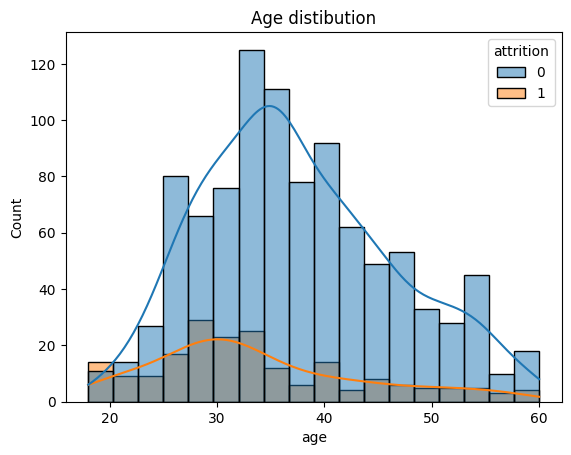

In [189]:
sns.histplot(data=df_train_full, x='age',hue='attrition',kde=True)
plt.title(label='Age distibution')
plt.show();

# Start and Retirement ages are the focus here 

### Summary: Prepare Data 

* Minimum start Age is 18
* Retirement Age is 60
* Attrition seemed to occur with younger age ranging from 18
* Observed a peak at age 30.
* Declining move from age 40 through to ago 60, which seems like the retirement age.
* Plot of 2 graphs campared indicates an imbalanced Class data as it seems proportion of employees leaving is low compared to those that stay perphaps until retirement age.

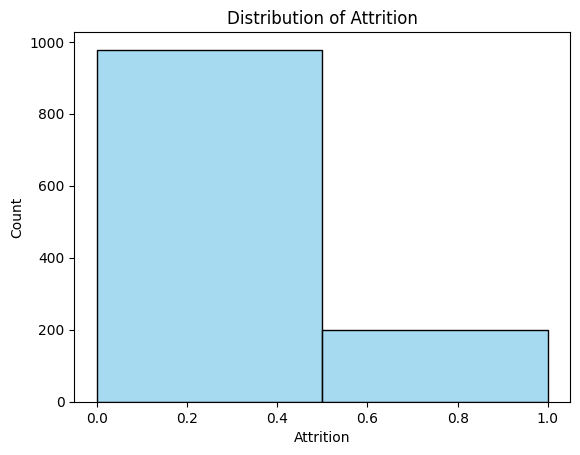

In [190]:
# Create a histogram of the 'Attrition' target variable
sns.histplot(data=df_train_full, x='attrition', bins=2, kde=False, color='skyblue')

# Add labels and a title to the plot
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition')



# Show the plot
plt.show();

In [191]:
 df_train_full.attrition.value_counts()

attrition
0    978
1    198
Name: count, dtype: int64

In [192]:
global_mean = df_train_full.attrition.mean().round(3)
global_mean

np.float64(0.168)

 ### Attrition percentage on the dataset is 16.8% approximately
 * From the training dataset, approximately 16% of the employees seized to be employed.
 * Approximately, 16% of the workforce had left as seen in the training data. The proportion can be referred to as the Attrition rate. This is a case of an imbalanced dataset. Which means that the positive and negative classes were not equally distributed. It is a good thing but in a desirable condition, it is to have the ratio lower otherwise, there is no need to attempt to solve the problem using machine learning.

From the analysis above it seems more people (978) stay on the job than people (198) who leave. Therefore, this classification problem is a case of data imbalance. Furthermore, there could be different reasons for these 236 people who have left the company

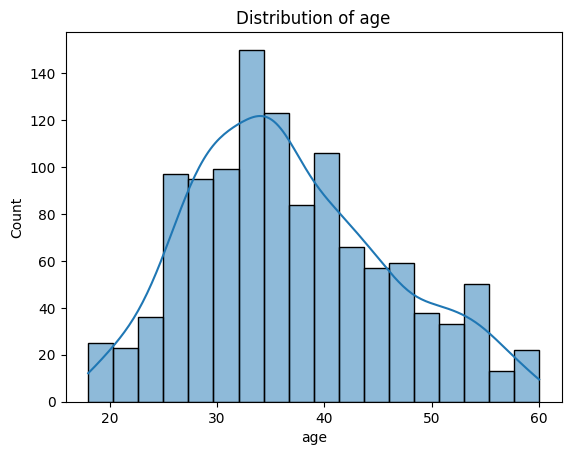

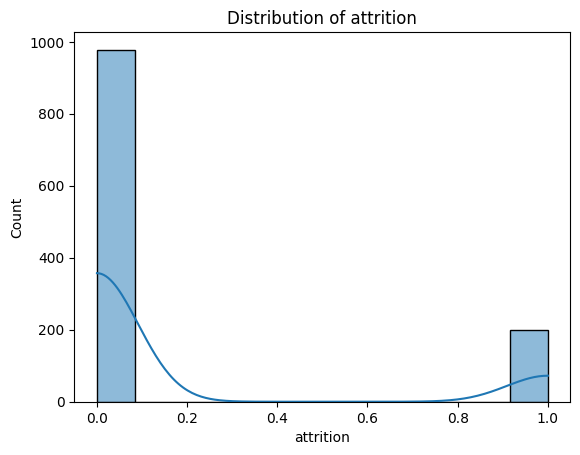

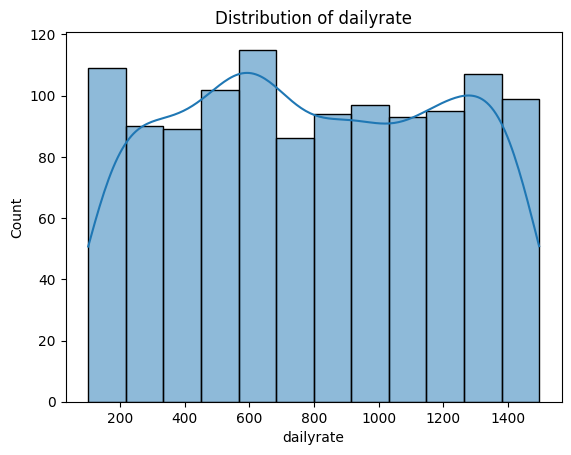

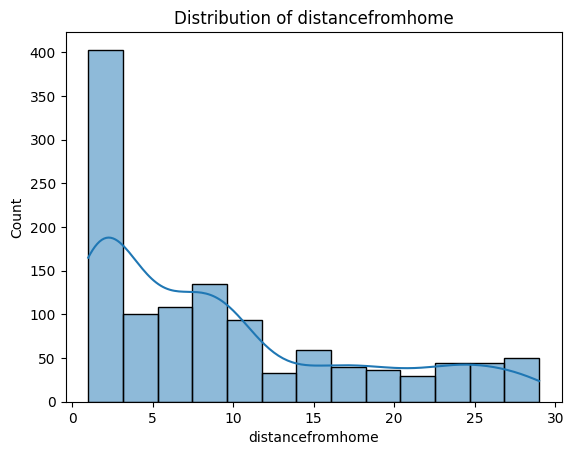

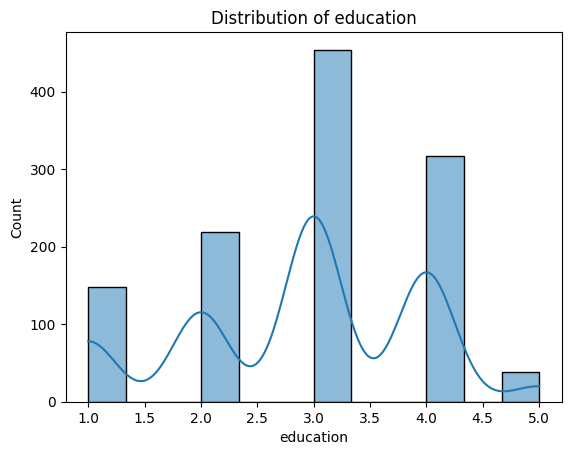

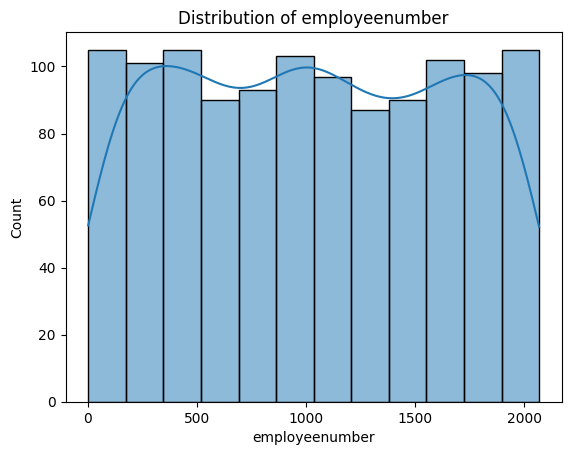

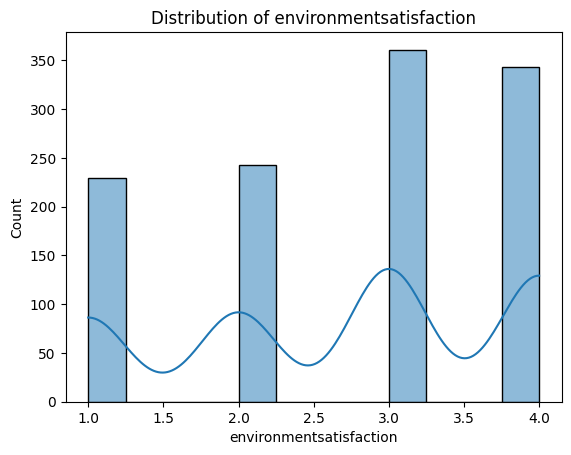

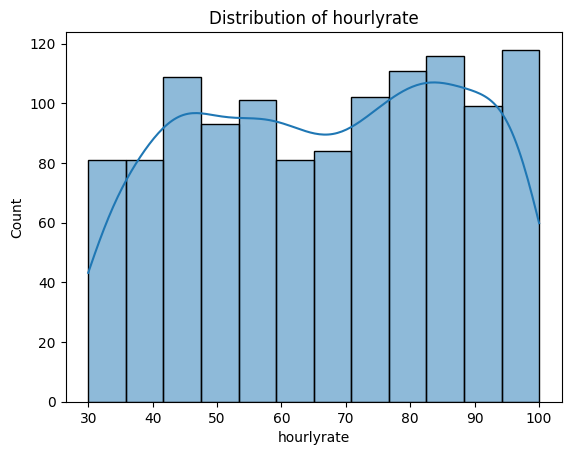

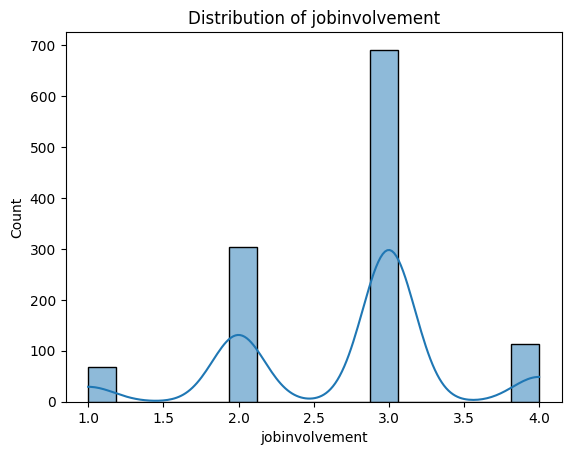

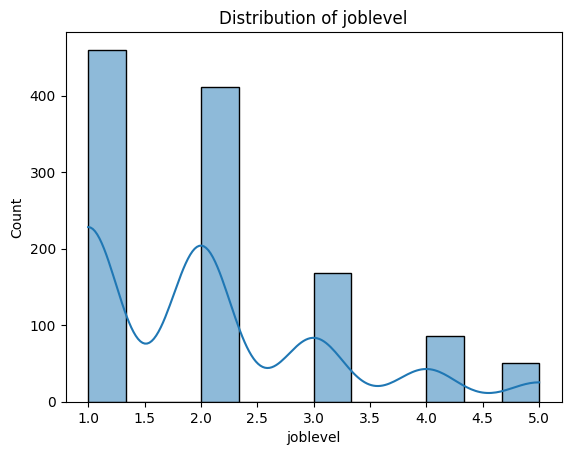

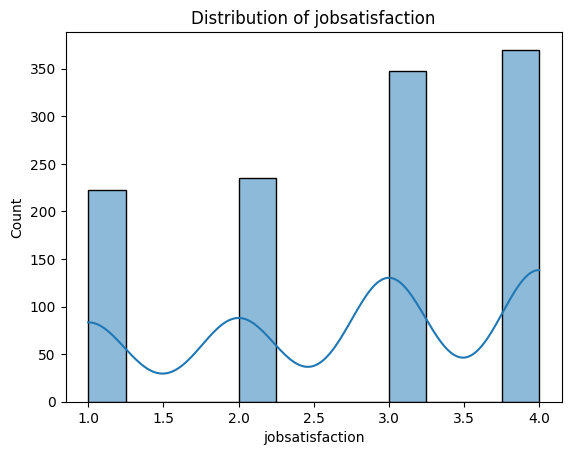

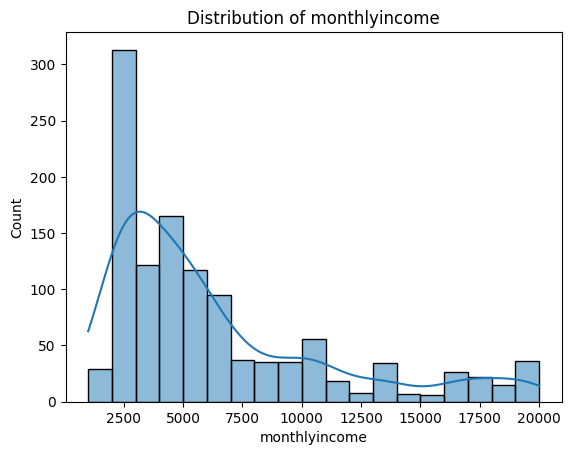

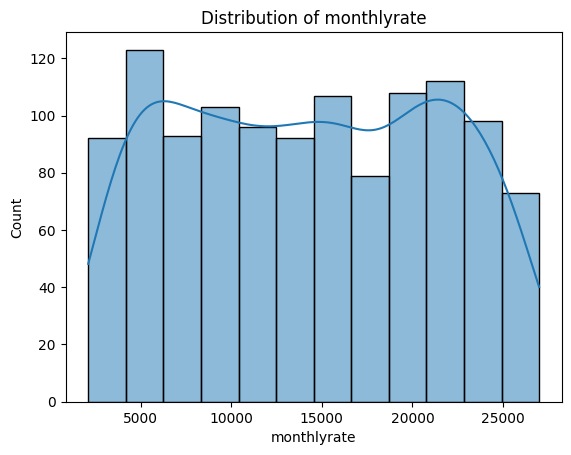

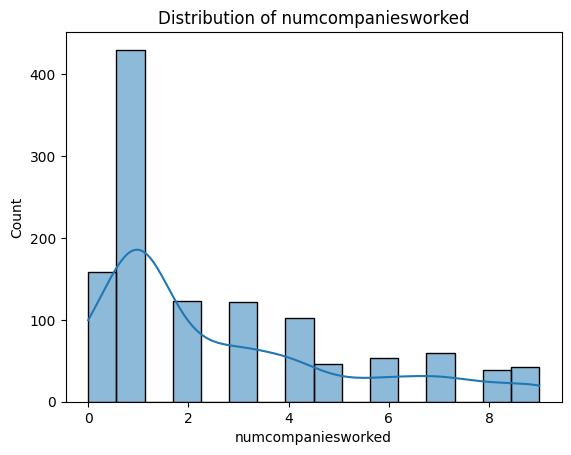

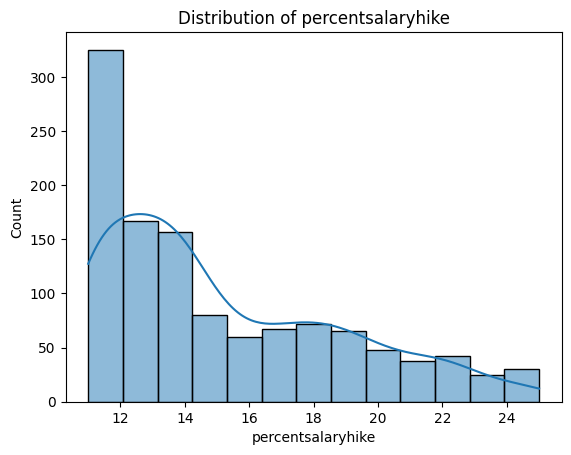

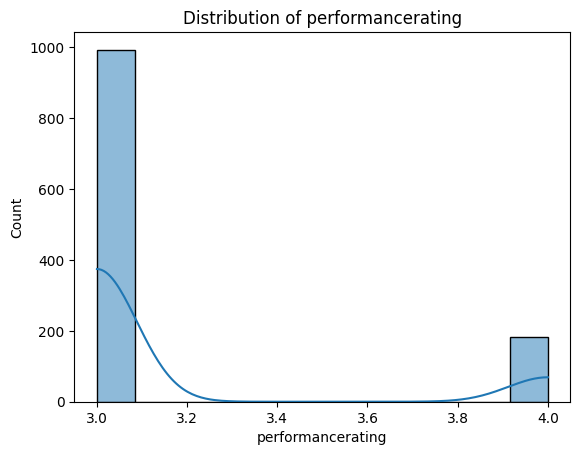

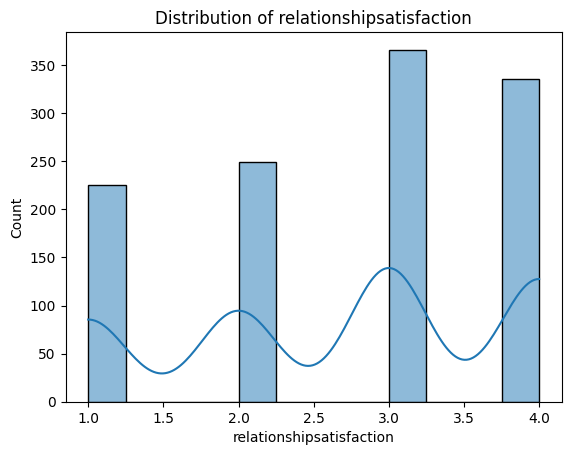

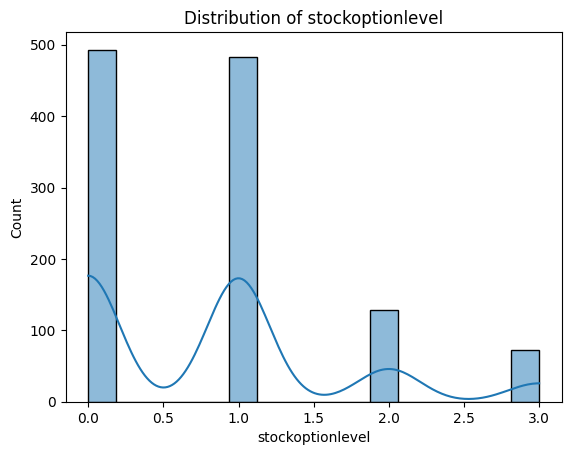

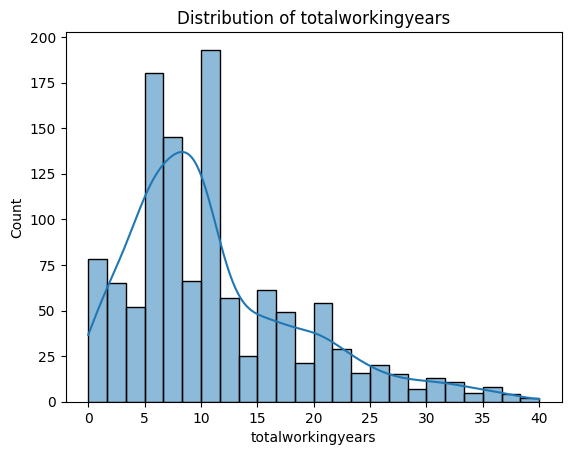

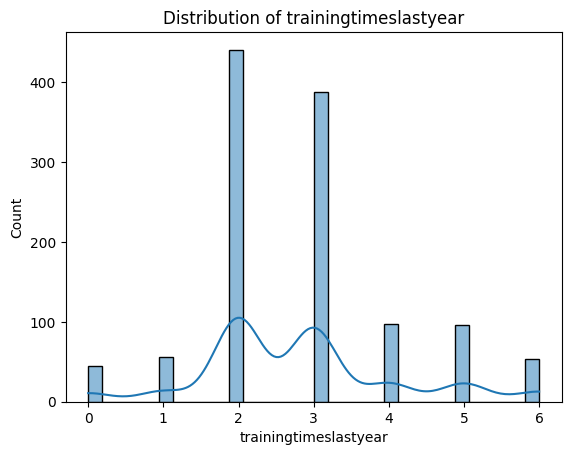

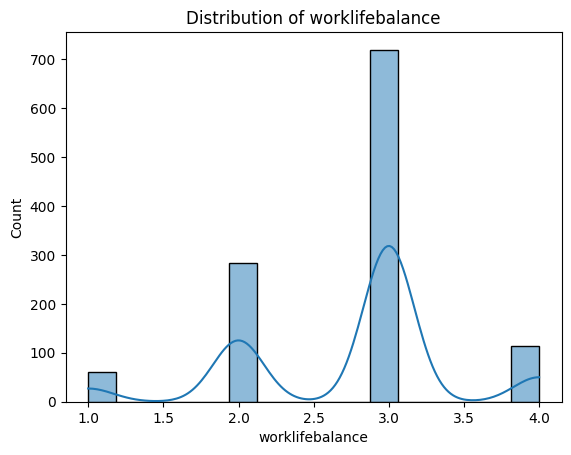

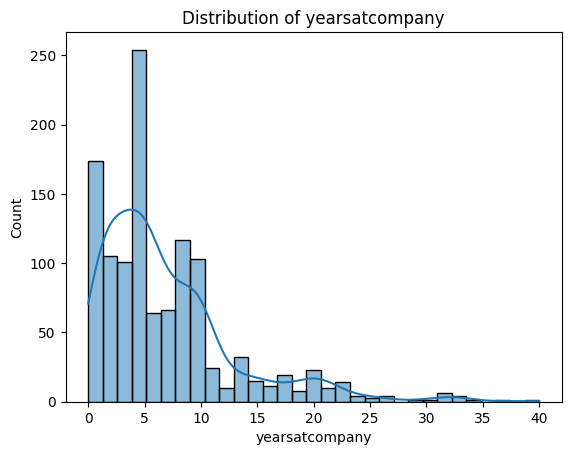

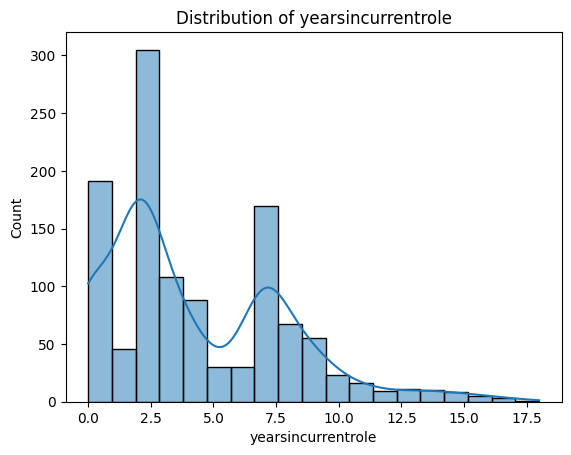

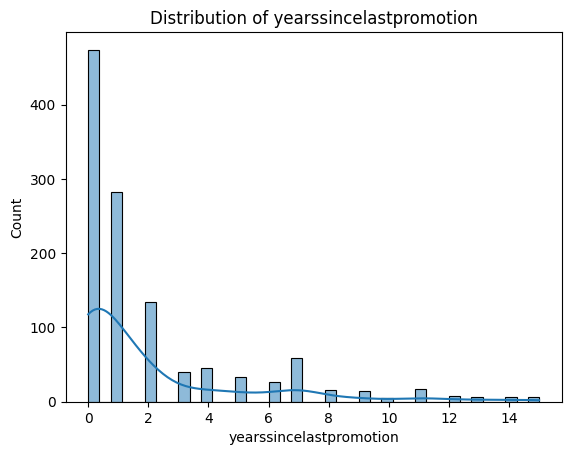

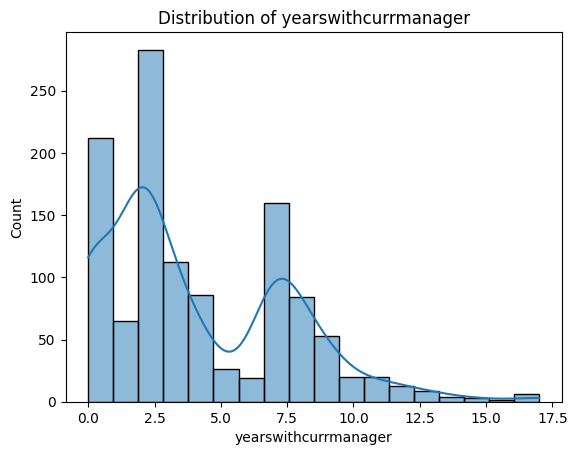

In [193]:
# Plot histograms for numerical features
for col in df_train_full.select_dtypes(include=['float64', 'int64']):
    sns.histplot(df_train_full[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

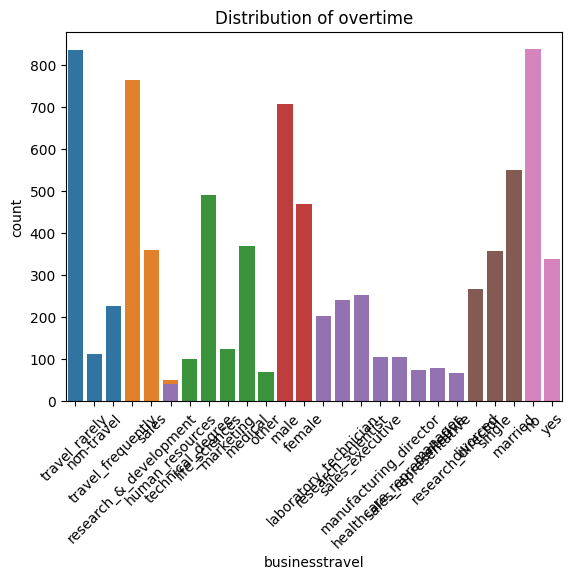

In [194]:
# Bar plot for categorical features
for col in df_train_full.select_dtypes(include=['object', 'category']):
    sns.countplot(x=col, data=df_train_full)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

In [195]:
# Identify categorical and numerical columns
cat_cols = df_train_full.select_dtypes(include=['object']).columns.tolist()
num_cols = df_train_full.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('attrition')  # Remove target variable from numeric columns

In [196]:
df_train_full[cat_cols].nunique()

businesstravel    3
department        3
educationfield    6
gender            2
jobrole           9
maritalstatus     3
overtime          2
dtype: int64

## Feature Importance: Correlation


In [197]:
# corelation of 'attrition' with the rest
df_features = df.copy()
df_features.dtypes

age                          int64
attrition                    int64
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
stockoptionlevel             int64
totalworkingyears            int64
trainingtimeslastyear        int64
worklifebalance              int64
yearsatcompany      

In [198]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_features['businesstravel'] = encoder.fit_transform(df_features['businesstravel'])
df_features['department'] = encoder.fit_transform(df_features['department'])
df_features['educationfield'] = encoder.fit_transform(df_features['educationfield'])
df_features['gender'] = encoder.fit_transform(df_features['gender'])
df_features['jobrole'] = encoder.fit_transform(df_features['jobrole'])
df_features['maritalstatus'] = encoder.fit_transform(df_features['maritalstatus'])
df_features['overtime'] = encoder.fit_transform(df_features['overtime'])

In [199]:
df_features.corr()['attrition'].sort_values(ascending=False)

attrition                   1.000000
overtime                    0.246118
maritalstatus               0.162070
distancefromhome            0.077924
jobrole                     0.067151
department                  0.063991
numcompaniesworked          0.043494
gender                      0.029453
educationfield              0.026846
monthlyrate                 0.015170
performancerating           0.002889
businesstravel              0.000074
hourlyrate                 -0.006846
employeenumber             -0.010577
percentsalaryhike          -0.013478
education                  -0.031373
yearssincelastpromotion    -0.033019
relationshipsatisfaction   -0.045872
dailyrate                  -0.056652
trainingtimeslastyear      -0.059478
worklifebalance            -0.063939
environmentsatisfaction    -0.103369
jobsatisfaction            -0.103481
jobinvolvement             -0.130016
yearsatcompany             -0.134392
stockoptionlevel           -0.137145
yearswithcurrmanager       -0.156199
a

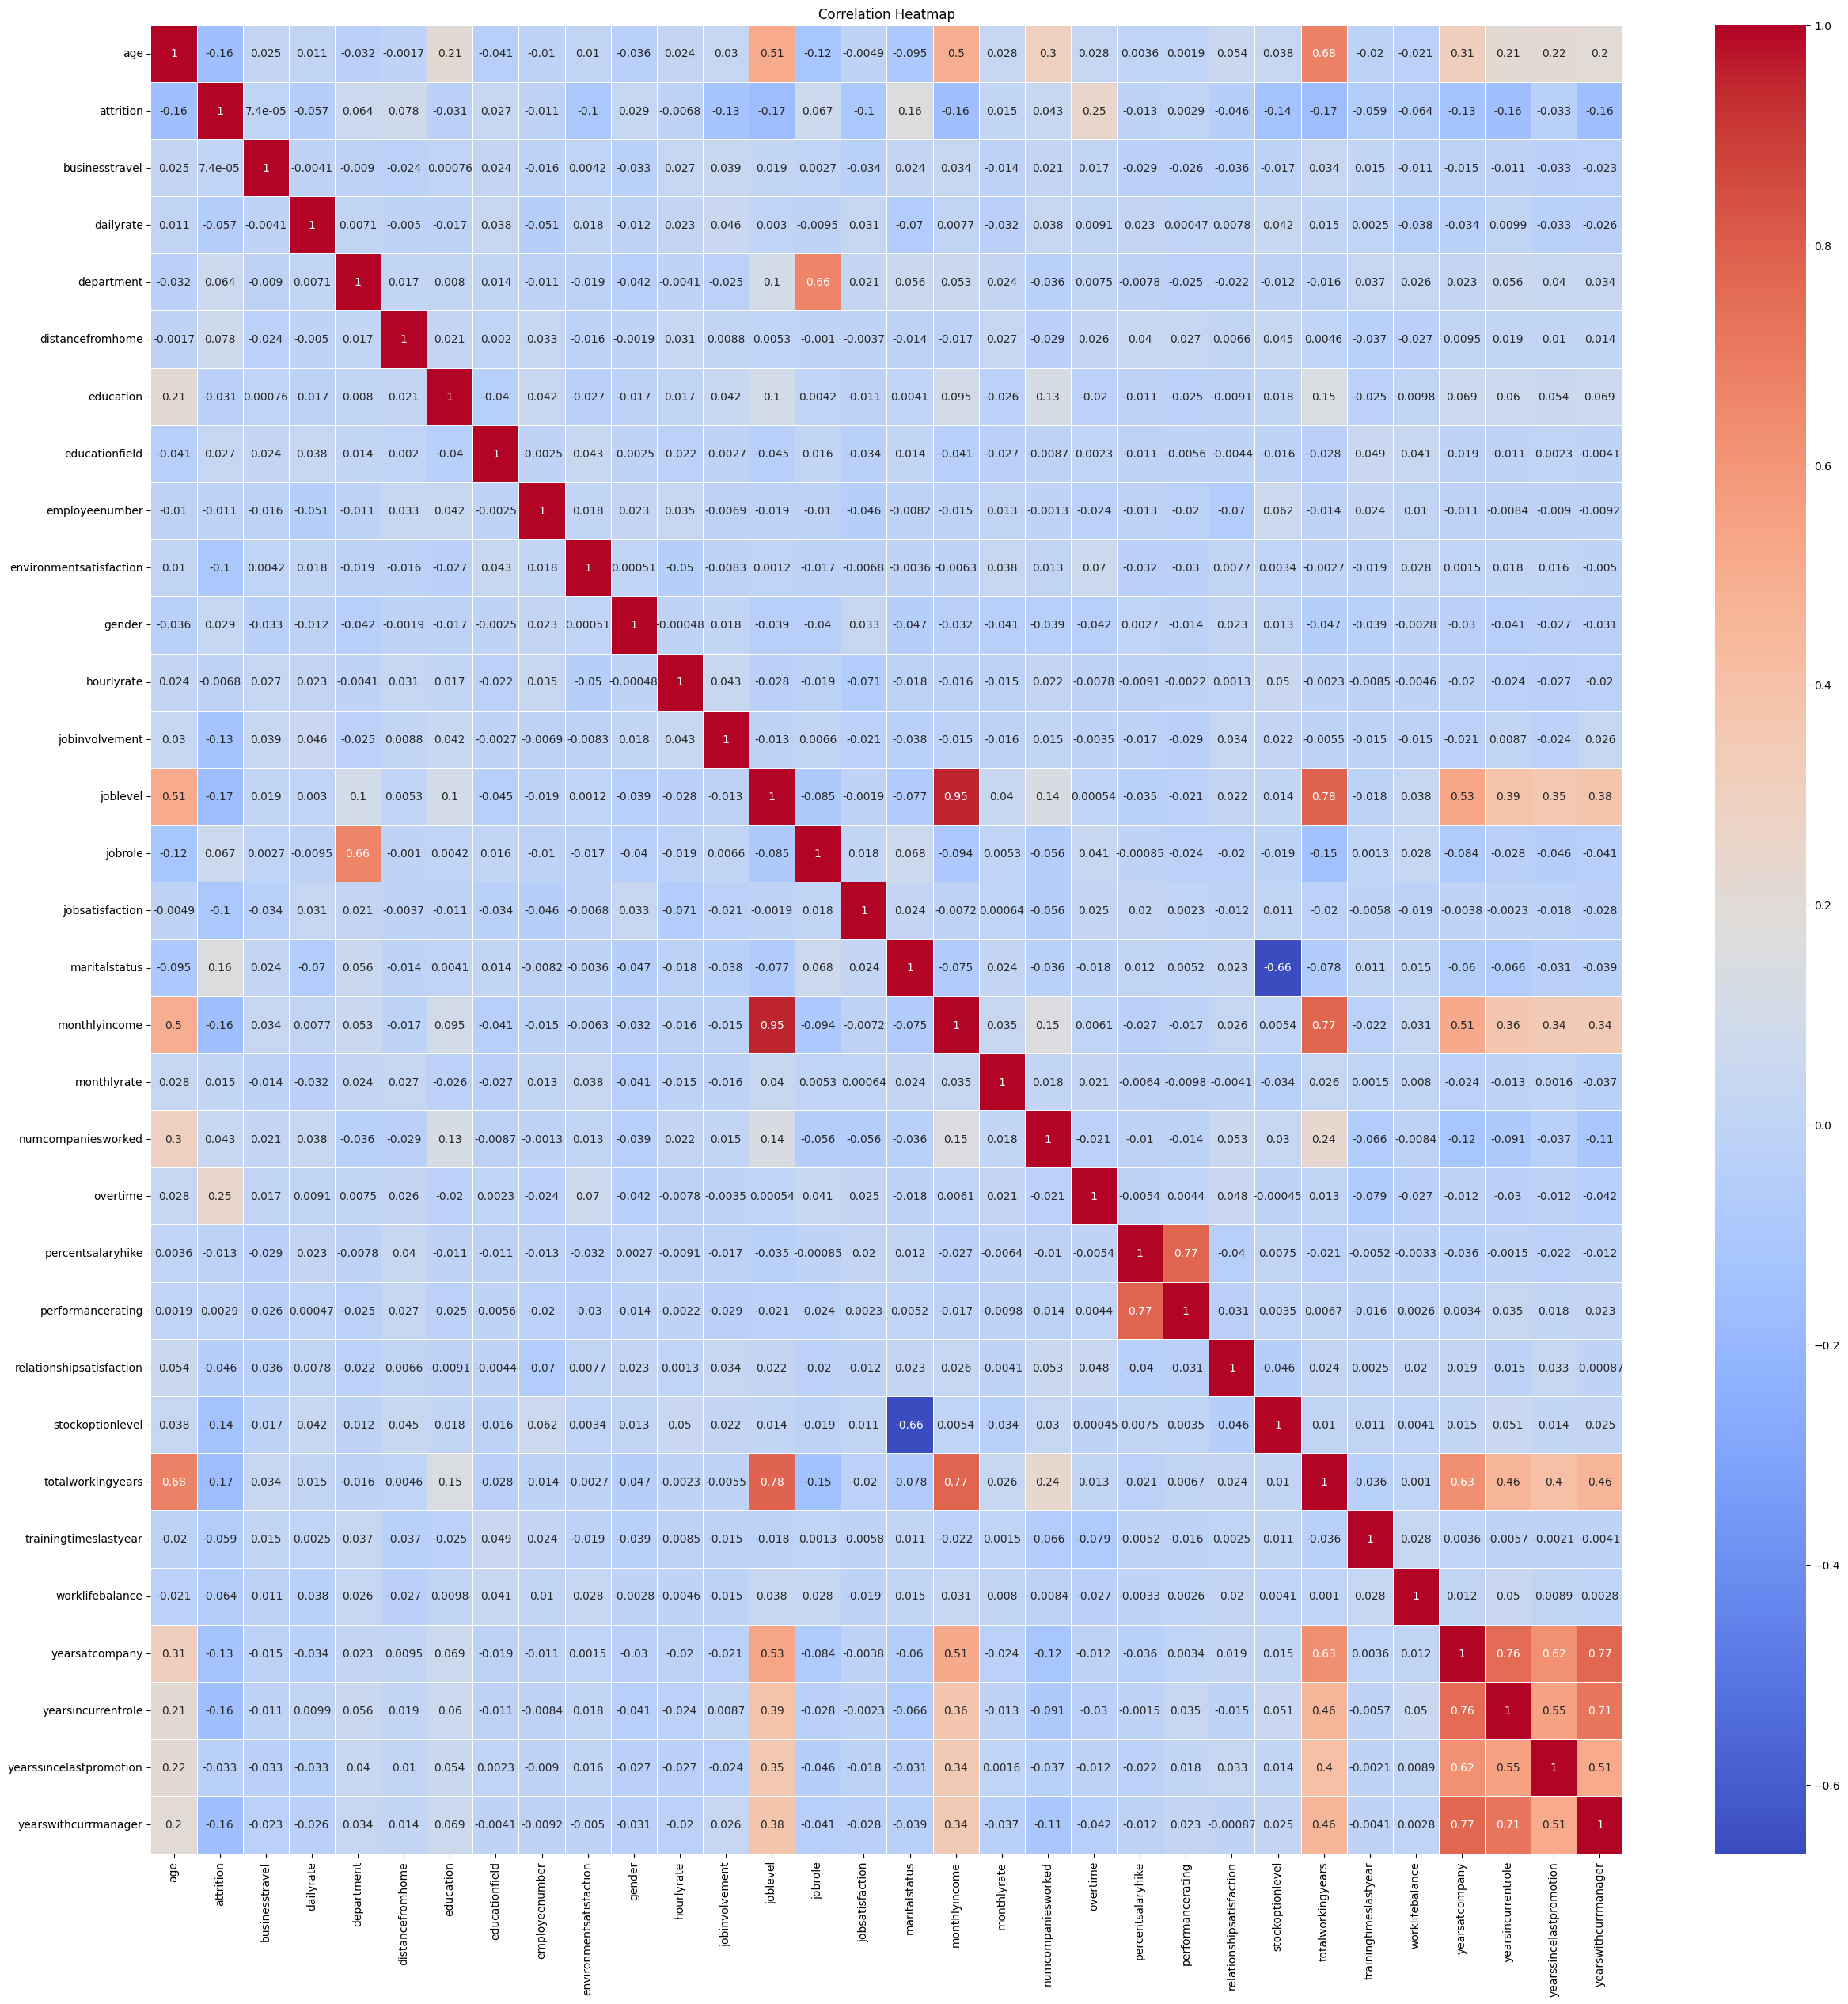

In [200]:
# Correlation Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [201]:
# Top features
correlations = df_features.corr()['attrition']
top_13_features = correlations.abs().nlargest(14).index
top_13_corr_values = correlations[top_13_features]
top_13_corr_values

attrition                  1.000000
overtime                   0.246118
totalworkingyears         -0.171063
joblevel                  -0.169105
maritalstatus              0.162070
yearsincurrentrole        -0.160545
monthlyincome             -0.159840
age                       -0.159205
yearswithcurrmanager      -0.156199
stockoptionlevel          -0.137145
yearsatcompany            -0.134392
jobinvolvement            -0.130016
jobsatisfaction           -0.103481
environmentsatisfaction   -0.103369
Name: attrition, dtype: float64

In [202]:
top_13_corr_values_df = top_13_corr_values.to_frame()
top_13_corr_values_df

,attrition
attrition,1.000000
overtime,0.246118
totalworkingyears,-0.171063
joblevel,-0.169105
maritalstatus,0.162070
yearsincurrentrole,-0.160545
monthlyincome,-0.159840
age,-0.159205
yearswithcurrmanager,-0.156199
stockoptionlevel,-0.137145


In [203]:
df_top_13_corr_index = top_13_corr_values_df.index
df_top_13_corr_index

Index(['attrition', 'overtime', 'totalworkingyears', 'joblevel',
       'maritalstatus', 'yearsincurrentrole', 'monthlyincome', 'age',
       'yearswithcurrmanager', 'stockoptionlevel', 'yearsatcompany',
       'jobinvolvement', 'jobsatisfaction', 'environmentsatisfaction'],
      dtype='object')

### Feature engineering
* Transform all categorical variables to numeric features
* Scaling to standardize numerical features to ensure consistent scaling
* handling class imbalance - Use class weights

In [204]:
# Separate into numerical and categorical columns
feature_num_cols = [col for col in df_top_13_corr_index if col in num_cols]
feature_cat_cols = [col for col in df_top_13_corr_index if col in cat_cols]

In [205]:
feature_cat_cols

['overtime', 'maritalstatus']

In [206]:
feature_num_cols

['totalworkingyears',
 'joblevel',
 'yearsincurrentrole',
 'monthlyincome',
 'age',
 'yearswithcurrmanager',
 'stockoptionlevel',
 'yearsatcompany',
 'jobinvolvement',
 'jobsatisfaction',
 'environmentsatisfaction']

In [207]:
'''# One-hot encoding for categorical variables
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')'''
# One-hot encoding for categorical variables
dict_train = df_train[feature_num_cols + feature_cat_cols].to_dict(orient='records')
dict_val = df_val[feature_num_cols + feature_cat_cols].to_dict(orient='records')
dict_test = df_test[feature_num_cols + feature_cat_cols].to_dict(orient='records')

In [208]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

X_train_encoded = dv.fit_transform(dict_train)
X_val_encoded = dv.fit_transform(dict_val)
X_test_encoded = dv.fit_transform(dict_test)

In [209]:
dv.feature_names_

['age',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'overtime=no',
 'overtime=yes',
 'stockoptionlevel',
 'totalworkingyears',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearswithcurrmanager']

In [210]:
# scaling features

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)  # Only transform, don't fit!
X_test_scaled = scaler.transform(X_test_encoded)  # Only transform, don't fit!

In [211]:
X_train_scaled

array([[ 0.8972268 ,  1.17109419,  0.41905713, ..., -0.3245046 ,
        -0.33532939, -0.84958992],
       [-1.06103175,  1.17109419,  0.41905713, ..., -0.48342357,
        -0.60943553, -0.57112901],
       [-1.60499246, -0.64740066, -2.39165304, ..., -0.48342357,
        -0.33532939, -0.84958992],
       ...,
       [ 1.76756393, -1.55664809,  0.41905713, ..., -0.80126151,
        -1.15764781, -0.57112901],
       [-1.93136888,  1.17109419,  0.41905713, ..., -1.11909944,
        -1.15764781, -1.12805083],
       [-1.16982389,  1.17109419,  0.41905713, ..., -0.3245046 ,
        -0.88354167, -0.01420719]])

In [212]:
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
#  handling class imbalance - Use class weights
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(y_train), 
                                   y=y_train)
weight_dict = dict(zip(np.unique(y_train), class_weights))

In [213]:
class_weights

array([0.60081744, 2.97972973])

In [214]:
weight_dict

{np.int64(0): np.float64(0.6008174386920981),
 np.int64(1): np.float64(2.97972972972973)}

## Decision Tree Classifier

In [215]:
# corelation of 'attrition' with the rest
df_features = df.copy()
df_features.dtypes

age                          int64
attrition                    int64
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
stockoptionlevel             int64
totalworkingyears            int64
trainingtimeslastyear        int64
worklifebalance              int64
yearsatcompany      

In [216]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df_features.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to categorical columns
for column in categorical_columns:
    df_features[column] = encoder.fit_transform(df_features[column])

In [217]:
df_features

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [218]:
df_features.corr()['attrition'].sort_values(ascending=False)

attrition                   1.000000
overtime                    0.246118
maritalstatus               0.162070
distancefromhome            0.077924
jobrole                     0.067151
department                  0.063991
numcompaniesworked          0.043494
gender                      0.029453
educationfield              0.026846
monthlyrate                 0.015170
performancerating           0.002889
businesstravel              0.000074
hourlyrate                 -0.006846
employeenumber             -0.010577
percentsalaryhike          -0.013478
education                  -0.031373
yearssincelastpromotion    -0.033019
relationshipsatisfaction   -0.045872
dailyrate                  -0.056652
trainingtimeslastyear      -0.059478
worklifebalance            -0.063939
environmentsatisfaction    -0.103369
jobsatisfaction            -0.103481
jobinvolvement             -0.130016
yearsatcompany             -0.134392
stockoptionlevel           -0.137145
yearswithcurrmanager       -0.156199
a

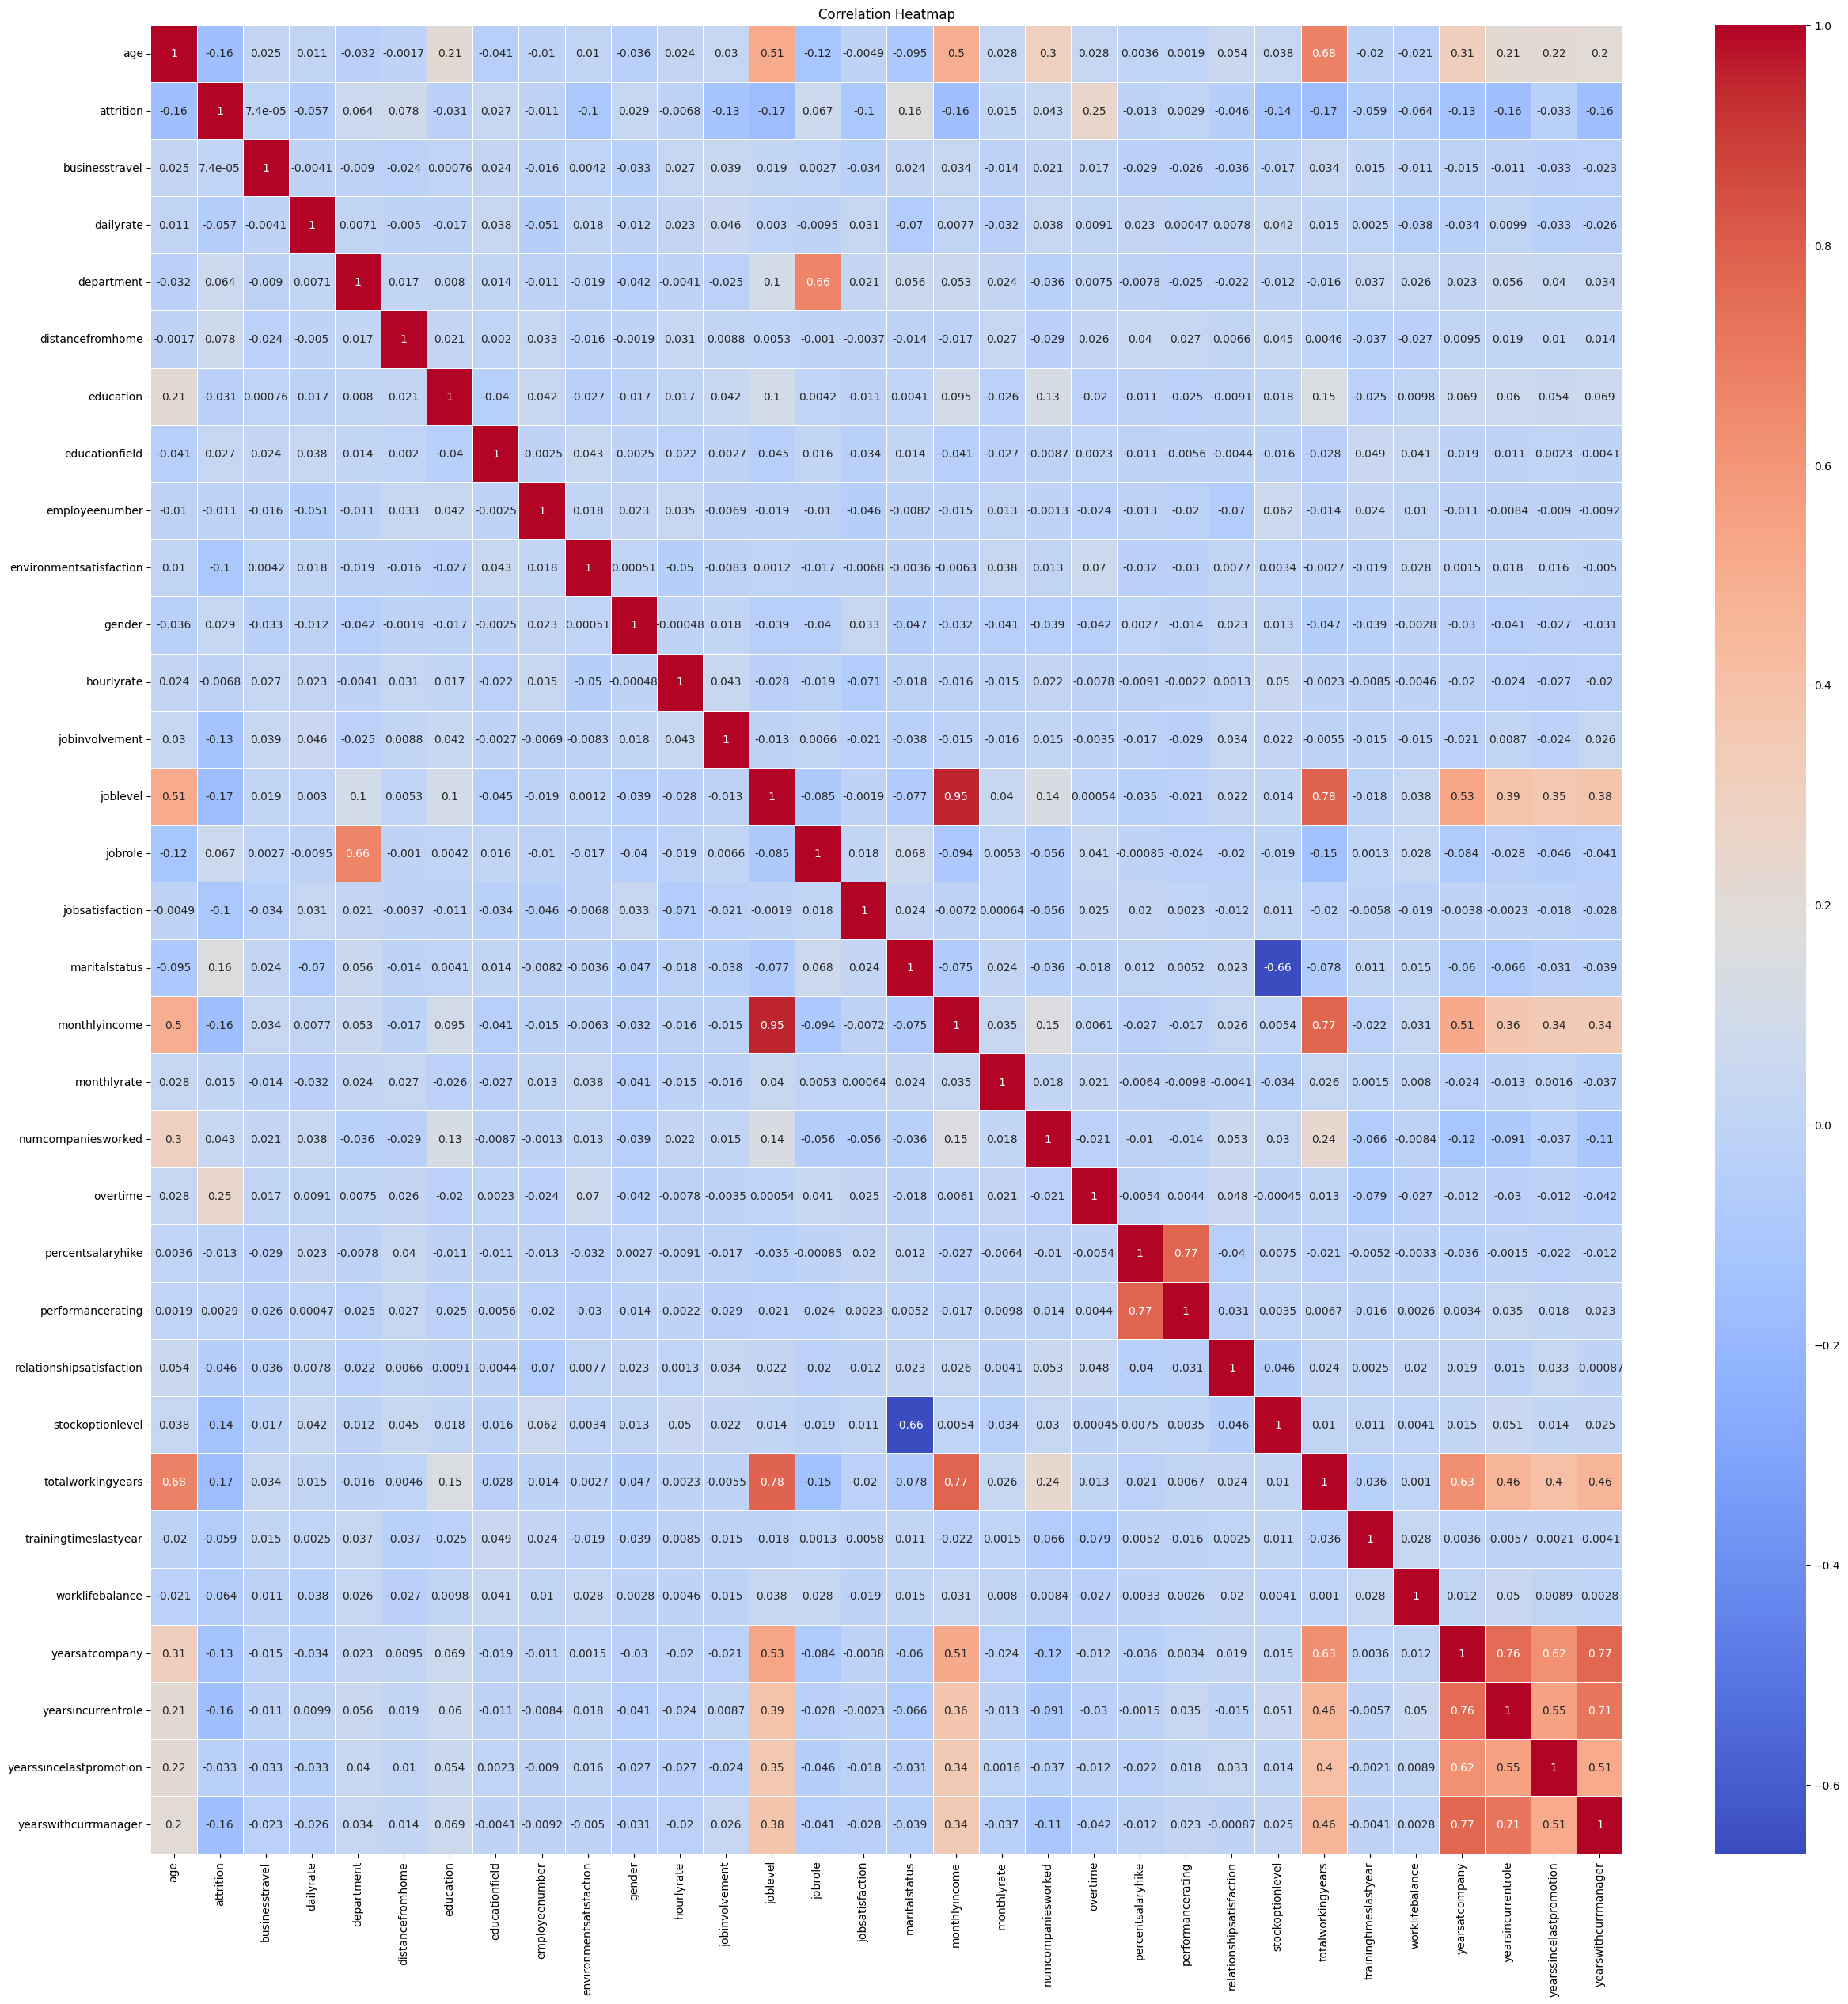

In [219]:
# Correlation Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

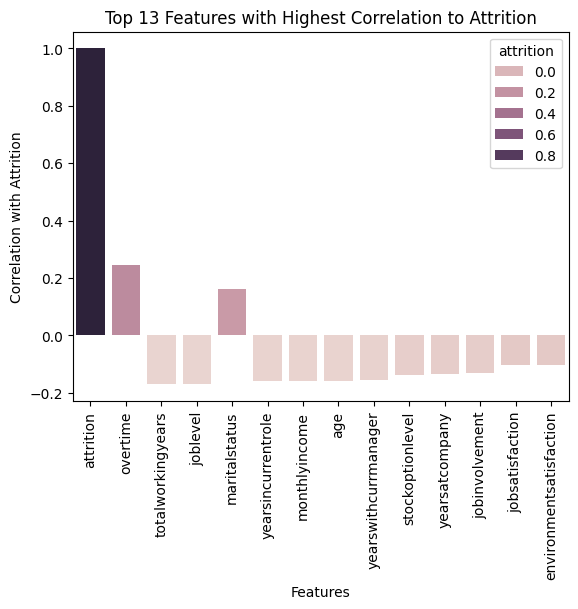

In [220]:
# Top features
correlations = df_features.corr()['attrition']
top_13_features = correlations.abs().nlargest(14).index
top_13_corr_values = correlations[top_13_features]

# plt.figure(figsize=(10, 11))
sns.barplot(x=top_13_features, y=top_13_corr_values, hue=top_13_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Attrition')
plt.title('Top 13 Features with Highest Correlation to Attrition')
plt.xticks(rotation=90)
plt.show()

In [221]:
top_13_features

Index(['attrition', 'overtime', 'totalworkingyears', 'joblevel',
       'maritalstatus', 'yearsincurrentrole', 'monthlyincome', 'age',
       'yearswithcurrmanager', 'stockoptionlevel', 'yearsatcompany',
       'jobinvolvement', 'jobsatisfaction', 'environmentsatisfaction'],
      dtype='object')

In [222]:
top_13_corr_values

attrition                  1.000000
overtime                   0.246118
totalworkingyears         -0.171063
joblevel                  -0.169105
maritalstatus              0.162070
yearsincurrentrole        -0.160545
monthlyincome             -0.159840
age                       -0.159205
yearswithcurrmanager      -0.156199
stockoptionlevel          -0.137145
yearsatcompany            -0.134392
jobinvolvement            -0.130016
jobsatisfaction           -0.103481
environmentsatisfaction   -0.103369
Name: attrition, dtype: float64

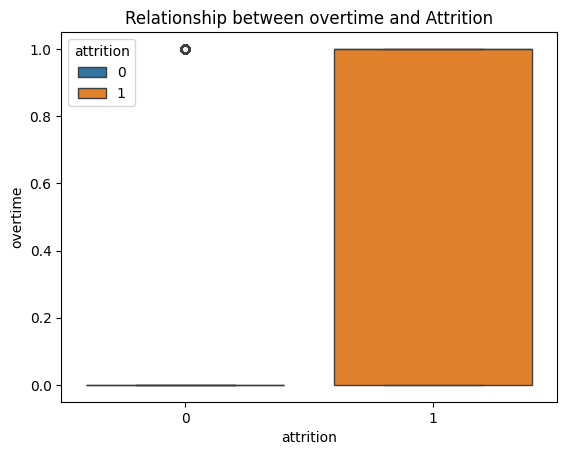

In [223]:
# Relationship between overtime and Attrition
sns.boxplot(data=df_features, x='attrition', y='overtime', hue='attrition')
plt.title('Relationship between overtime and Attrition')
plt.show()

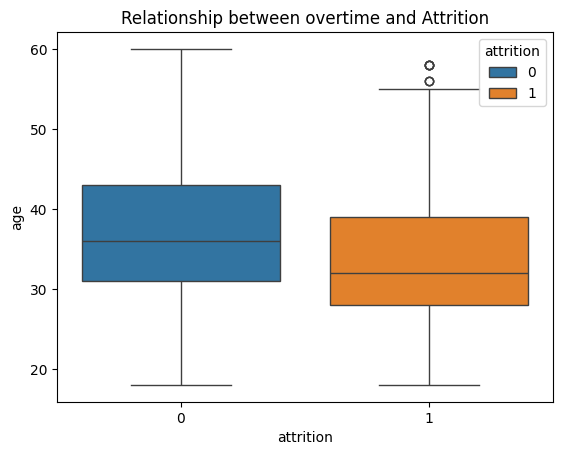

In [224]:
# Relationship between Age and Attrition
sns.boxplot(data=df_features, x='attrition', y='age', hue='attrition')
plt.title('Relationship between overtime and Attrition')
plt.show()

Attrition category 1 (orange):

Represents employees who left due to overtime.
* Median age is lower than 40, indicating younger employees are more likely to leave.
* The range is similar to category 0 but includes some outliers above the maximum age.

### Feature selection

In [225]:
# Separate into numerical and categorical columns
correlated_num_cols = [col for col in top_13_features if col in num_cols]
correlated_cat_cols = [col for col in top_13_features if col in cat_cols]

# Convert to DataFrames
'''df_num_cols = pd.DataFrame({'Numerical Columns': correlated_num_cols})
df_cat_cols = pd.DataFrame({'Categorical Columns': correlated_cat_cols})'''
df_num_cols = pd.DataFrame(correlated_num_cols)
df_cat_cols = pd.DataFrame(correlated_cat_cols)

In [226]:
df_num_cols

,0
0,totalworkingyears
1,joblevel
2,yearsincurrentrole
3,monthlyincome
4,age
5,yearswithcurrmanager
6,stockoptionlevel
7,yearsatcompany
8,jobinvolvement
9,jobsatisfaction


In [227]:
df_cat_cols

,0
0,overtime
1,maritalstatus


In [228]:
df_features.df_features[df_cat_cols]

AttributeError: 'DataFrame' object has no attribute 'df_features'

In [ ]:
features =['attrition','overtime', 'totalworkingyears', 'joblevel',
       'maritalstatus', 'yearsincurrentrole', 'monthlyincome', 'age',
       'yearswithcurrmanager', 'stockoptionlevel', 'yearsatcompany',
       'jobinvolvement', 'jobsatisfaction', 'environmentsatisfaction']

In [ ]:
# Concatenate the DataFrames
df_features = pd.concat([df_num_cols.rename(columns={'Numerical Columns': 'Columns'}),
                         df_cat_cols.rename(columns={'Categorical Columns': 'Columns'})],
                        ignore_index=True)



In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
# Set random seed
SEED = 42

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [ ]:
len(df_train), len(df_val), len(df_test)

In [ ]:
len(df_full_train)

In [ ]:
 df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

In [ ]:
len(y_train), len(y_val), len(y_test), 

In [ ]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

In [ ]:
df_full_train.info()

In [ ]:
# df_full_train.attrition.value_counts(normalize=True) # Heads up for imbalance target value
df_full_train.attrition.value_counts()

In [ ]:
df_train

In [229]:
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
#  handling class imbalance - Use class weights
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(y_train), 
                                   y=y_train)
weight_dict = dict(zip(np.unique(y_train), class_weights))

In [230]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [231]:
X_train_scaled

array([[ 0.8972268 ,  1.17109419,  0.41905713, ..., -0.3245046 ,
        -0.33532939, -0.84958992],
       [-1.06103175,  1.17109419,  0.41905713, ..., -0.48342357,
        -0.60943553, -0.57112901],
       [-1.60499246, -0.64740066, -2.39165304, ..., -0.48342357,
        -0.33532939, -0.84958992],
       ...,
       [ 1.76756393, -1.55664809,  0.41905713, ..., -0.80126151,
        -1.15764781, -0.57112901],
       [-1.93136888,  1.17109419,  0.41905713, ..., -1.11909944,
        -1.15764781, -1.12805083],
       [-1.16982389,  1.17109419,  0.41905713, ..., -0.3245046 ,
        -0.88354167, -0.01420719]])

In [232]:
class_weights

array([0.60081744, 2.97972973])

In [233]:
weight_dict

{np.int64(0): np.float64(0.6008174386920981),
 np.int64(1): np.float64(2.97972972972973)}

## Model training

#### Logistic regression

In [234]:
from sklearn.linear_model import LogisticRegression

# Correct class weights
class_weights = {0: 0.60081744, 1: 2.97972973}

# Create and train the Logistic Regression model
model_lr = LogisticRegression(class_weight=class_weights, random_state=42, solver='liblinear')

# Train the model
model_lr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model_lr.predict(X_val_scaled)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.86      0.63      0.72       255
           1       0.11      0.31      0.16        39

    accuracy                           0.59       294
   macro avg       0.48      0.47      0.44       294
weighted avg       0.76      0.59      0.65       294



In [235]:
# Get predictions
y_pred_proba = model_lr.predict_proba(X_val_scaled)[:, 1]

In [236]:
y_pred[:5]

array([0, 0, 1, 1, 0])

In [237]:
y_val[:5]

array([0, 0, 1, 0, 0])

In [238]:
# Per-class metrics

from sklearn.metrics import classification_report, precision_score, recall_score

precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

print("\nPer-class metrics:")
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Class {i}:")
    print(f"  Precision: {p:.3f}")
    print(f"  Recall: {r:.3f}")
    print(f"  F1-score: {f:.3f}")


Per-class metrics:
Class 0:
  Precision: 0.941
  Recall: 0.721
  F1-score: 0.817
Class 1:
  Precision: 0.364
  Recall: 0.780
  F1-score: 0.497


In [ ]:
# Ensure y_test is 1D
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

In [239]:
# ROC-AUC

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.826639344262295


In [240]:
# Confusion Matrix (normalized)
cm = confusion_matrix(y_val, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("\nNormalized Confusion Matrix:")
print(cm_normalized)


Normalized Confusion Matrix:
[[0.72131148 0.27868852]
 [0.22       0.78      ]]


### Decision Tree Classifier

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier(class_weight=class_weights, random_state=SEED)
model_dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight={0: 0.60081744, 1: 2.97972973},
                       random_state=42)

In [244]:
# Get predictions
y_pred = model_dt.predict(X_val_scaled)
y_pred_proba = model_dt.predict_proba(X_val_scaled)[:, 1]

In [245]:
# ROC-AUC
roc_auc = roc_auc_score(y_val,y_pred_proba)
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.6918852459016394


#### DT AUC on the validation is 69% Approx.

### Decision Tree Parameter Tuning


In [246]:
# parameter tuning
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        model_dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=SEED)
        model_dt.fit(X_train_scaled, y_train)

        # Get predictions
        # y_pred = model_dt.predict(df_val_scaled)
        y_pred_proba = model_dt.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val,y_pred_proba)
        
        scores.append((depth, s, roc_auc))

In [247]:
columns = ['max_depth', 'min_samples_leaf', 'roc_auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [248]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['roc_auc'])
df_scores_pivot.round(3)

roc_auc              
max_depth              4      5      6
min_samples_leaf                      
1                  0.759  0.750  0.729
5                  0.753  0.743  0.731
10                 0.778  0.767  0.722
15                 0.765  0.740  0.725
20                 0.752  0.719  0.717
100                0.679  0.681  0.681
200                0.751  0.751  0.751
500                0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

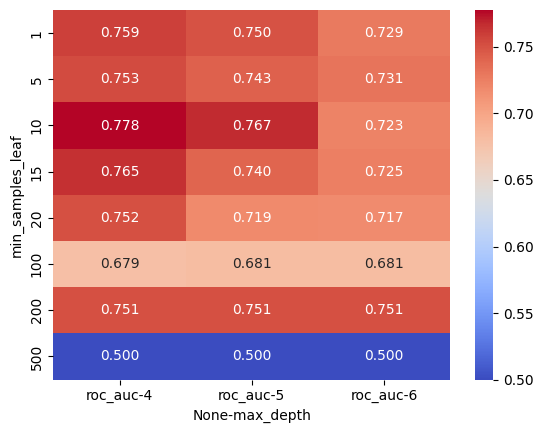

In [249]:
sns.heatmap(df_scores_pivot, annot=True, cmap='coolwarm', fmt=".3f")

In [251]:
model_dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=13)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=13)

In [252]:
y_pred_proba = model_dt.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.7777459016393442


#### The DT tuning yielded on the validation is 78% Approx. An improvement the 61% previous AUC result. 

In [275]:
dv.feature_names_

['age',
 'environmentsatisfaction',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'maritalstatus=divorced',
 'maritalstatus=married',
 'maritalstatus=single',
 'monthlyincome',
 'overtime=no',
 'overtime=yes',
 'stockoptionlevel',
 'totalworkingyears',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearswithcurrmanager']

In [276]:
from sklearn.tree import export_text
print(export_text(model_dt, feature_names=dv.feature_names_))

|--- monthlyincome <= -0.85
|   |--- overtime=yes <= 0.47
|   |   |--- totalworkingyears <= -1.21
|   |   |   |--- maritalstatus=single <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- maritalstatus=single >  0.44
|   |   |   |   |--- class: 1
|   |   |--- totalworkingyears >  -1.21
|   |   |   |--- totalworkingyears <= -0.21
|   |   |   |   |--- class: 0
|   |   |   |--- totalworkingyears >  -0.21
|   |   |   |   |--- class: 0
|   |--- overtime=yes >  0.47
|   |   |--- yearsincurrentrole <= -0.47
|   |   |   |--- monthlyincome <= -0.87
|   |   |   |   |--- class: 1
|   |   |   |--- monthlyincome >  -0.87
|   |   |   |   |--- class: 1
|   |   |--- yearsincurrentrole >  -0.47
|   |   |   |--- class: 0
|--- monthlyincome >  -0.85
|   |--- stockoptionlevel <= -0.38
|   |   |--- overtime=no <= -0.47
|   |   |   |--- environmentsatisfaction <= -0.19
|   |   |   |   |--- class: 1
|   |   |   |--- environmentsatisfaction >  -0.19
|   |   |   |   |--- class: 0
|   |   |--- overtime=no > 

#### Random Forest Classifier

In [277]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=SEED)
model_rf.fit(X_train_scaled, y_train)

# Get predictions
y_pred = model_rf.predict(X_val_scaled)
y_pred_proba = model_rf.predict_proba(X_val_scaled)[:, 1]

In [278]:
# ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8400409836065574


#### RF AUC on the validation is 84% Approx. Better than all the results from the Decision Trees.

#### Randon Forest Parameter Tuning


In [279]:
# parameter tuning

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        model_rf = RandomForestClassifier(n_estimators=n,
                                          max_depth=d,
                                          n_jobs=-1, 
                                          random_state=SEED)
        model_rf.fit(X_train_scaled, y_train)

        # Get predictions
        # y_pred = model_dt.predict(df_val_scaled)
        y_pred_proba = model_rf.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        
        scores.append((d, n, roc_auc))

In [280]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'roc_auc'])
df_scores

,max_depth,n_estimators,roc_auc
0,5,10,0.840656
1,5,20,0.845246
2,5,30,0.847295
3,5,40,0.848361
4,5,50,0.848770
5,5,60,0.851557
6,5,70,0.853279
7,5,80,0.851803
8,5,90,0.853852
9,5,100,0.856393


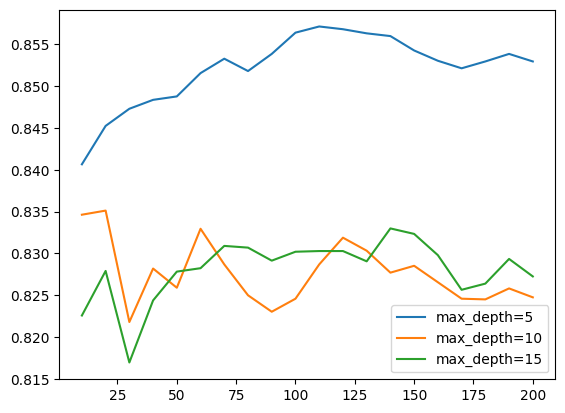

In [281]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.roc_auc,
             label='max_depth=%d' % d)

plt.legend()

In [283]:
max_depth = 5

In [284]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        model_rf = RandomForestClassifier(n_estimators=n,
                                          max_depth=max_depth,
                                          min_samples_leaf=s,
                                          n_jobs=-1, 
                                          random_state=SEED)
        model_rf.fit(X_train_scaled, y_train)

        # Get predictions
        # y_pred = model_dt.predict(df_val_scaled)
        y_pred_proba = model_rf.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        
        scores.append((s, n, roc_auc))  

In [285]:
columns = ['min_samples_leaf', 'n_estimators', 'roc_auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [286]:
df_scores

,min_samples_leaf,n_estimators,roc_auc
0,1,10,0.840656
1,1,20,0.845246
2,1,30,0.847295
3,1,40,0.848361
4,1,50,0.848770
...,...,...,...
95,50,160,0.845574
96,50,170,0.844344
97,50,180,0.844590
98,50,190,0.844344


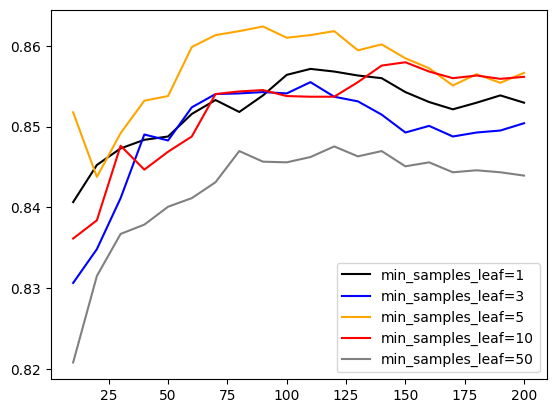

In [287]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.roc_auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [288]:
max_depth = 5
min_samples_leaf = 5

In [289]:
model_rf = RandomForestClassifier(n_estimators=200,
                                          max_depth=d,
                                          min_samples_leaf=min_samples_leaf,
                                          n_jobs=-1, 
                                          random_state=13)
model_rf.fit(X_train_scaled, y_train)

# Get predictions
# y_pred = model_dt.predict(df_val_scaled)
y_pred_proba = model_rf.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8401639344262295


#### RF AUC after tuning improved to 84% Approx.

#### Gradient boosting - XGBoost

In [292]:
# xgboost

import xgboost as xgb
from xgboost import XGBClassifier

dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val_scaled, label=y_val, feature_names=dv.feature_names_)

In [293]:
dval

In [294]:
'''xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'num_class': 2,
    'nthread': 8,
    'eval_metric': ['auc'],    
    'seed': SEED,
    'verbosity': 1,
}
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)'''

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': ['auc'],    
    'seed': SEED,
    'verbosity': 1,
}


In [295]:
print(dtrain.num_row())
print(dtrain.get_label().shape)


882
(882,)


In [296]:
dtrain = xgb.DMatrix(data=X_train_scaled, label=y_train)


In [297]:
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=15)


In [298]:
y_pred_proba = model_xgb.predict(dval)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8011475409836065


In [299]:
y_pred[:5]

array([0, 0, 1, 0, 0])

####  XGB Parameter Tuning Using Randomized Search CV


In [300]:
base_params = {
    'objective': 'binary:logistic',   # Binary classification
    'eval_metric': 'auc',            # Metric to optimize during training
    'seed': 42,                      # For reproducibility
    'nthread': 8,                    # Number of threads for parallel processing
    'verbosity': 1                   # Print logs during training
}


In [301]:
param_dist = {
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3, 4, 5],
    'lambda': [0, 1, 5, 10],
    'alpha': [0, 1, 5, 10],
    'n_estimators': [50, 100, 200, 300, 400, 500]
}

####  RandomizedSearchCV Setup Import necessary modules and set up the RandomizedSearchCV

In [302]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(**base_params)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,              # Number of random combinations to try
    scoring='roc_auc',       # Scoring metric
    cv=5,                    # Cross-validation folds
    verbose=1,               # Verbosity level
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all available cores
)


In [303]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0, 1, 5, 10],
                                        'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
                                        'gamma': [0, 1, 2, 3, 4, 5],
                                        'lambda': [0, 1, 5, 10],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [304]:
print("Best Parameters found:", random_search.best_params_)
print("Best AUC Score from tuning:", random_search.best_score_)

# Use the best model
best_xgb_model = random_search.best_estimator_


Best Parameters found: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 4, 'lambda': 1, 'gamma': 2, 'eta': 0.05, 'colsample_bytree': 0.8, 'alpha': 1}
Best AUC Score from tuning: 0.7985407408121492


### Selecting the Final Model

* Choose between the XGB, Randon Forest, Decision Tree and Logistic Regression Models
* Train the Best model on Full-train data
* Save the model.

#### XGB

In [305]:
# XGB

xgb_params = {
    'subsample': 0.8, 
    'n_estimators': 200, 
    'min_child_weight': 2, 
    'max_depth': 6, 
    'lambda': 1, 
    'gamma': 0, 
    'eta': 0.05, 
    'colsample_bytree': 0.6, 
    'alpha': 1,
}
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=15)

C:\Users\Acer\.virtualenvs\capstone1Project-0-gO0hTw\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:39:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [306]:
y_pred = model_xgb.predict(dval)
roc_auc = roc_auc_score(y_val, y_pred)
print(f"\nBest XGB ROC-AUC score: {roc_auc}")


Best XGB ROC-AUC score: 0.8659016393442623


#### Randon Forest

In [307]:
# Randon Forest

model_rf = RandomForestClassifier(n_estimators=200,
                                          max_depth=5,
                                          min_samples_leaf=5,
                                          random_state=13)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       random_state=13)

In [308]:
# Get predictions
y_pred = model_rf.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print(f"\nBest RF ROC-AUC score: {roc_auc}")


Best RF ROC-AUC score: 0.8518032786885246


#### Decision Tree

In [309]:
# Decision Tree

model_dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=13)
model_dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=13)

In [310]:
# Get Decision Tree predictions
y_pred = model_dt.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print(f"\nBest DT ROC-AUC score: {roc_auc}")


Best DT ROC-AUC score: 0.7777459016393442


#### Logistic Regression

In [311]:
# Logistic Regression

# Create and train the Logistic Regression model
model_lr = LogisticRegression(class_weight=weight_dict, random_state=42, solver='liblinear')

model_lr.fit(X_train_scaled, y_train)


LogisticRegression(class_weight={np.int64(0): np.float64(0.6008174386920981),
                                 np.int64(1): np.float64(2.97972972972973)},
                   random_state=42, solver='liblinear')

In [313]:
# Get Logistic Regression predictions
y_pred = model_lr.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print(f"\nBest LR ROC-AUC score: {roc_auc}")


Best LR ROC-AUC score: 0.826639344262295


#### Best Model - Final Model

In [ ]:
df_full_train 

In [ ]:
df_test

In [ ]:
df_full_test = df_full_train['attrition'  == '1']
df_full_test

In [ ]:
del df_full_train['attrition']

In [ ]:
df_full_train

In [ ]:

df_full_train_scaled = scaler.fit_transform(df_full_train)
df_full_test_scaled = scaler.transform(df_full_test)

In [ ]:
df_train_scaled = scaler.fit_transform(df_train)
df_full_test_scaled = scaler.transform(df_full_test)  # Only transform, don't fit!

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200,
                                          max_depth=5,
                                          min_samples_leaf=5,
                                          random_state=13)
model_rf.fit(df_full_train_scaled, df_test_scaled)

#### Above are the best Parameters for the XGB model performance score (AUC 79%)

In [ ]:
df_full_train 

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
df_full_train

In [ ]:
y_full_train = df_full_train['attrition']

In [ ]:
y_full_train

In [ ]:
del df_full_train['attrition']

In [ ]:
df_full_train

In [ ]:
'''from sklearn.feature_extraction import DictVectorizer

dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.fit_transform(dicts_test)'''

In [ ]:
# Scaling full-train features

scaler = StandardScaler()

X_full_train_scaled = scaler.fit_transform(df_full_train)
X_test_scaled = scaler.fit_transform(df_test)

In [ ]:
df_test

In [ ]:
# Randon Forest

model_rf = RandomForestClassifier(n_estimators=200,
                                          max_depth=5,
                                          min_samples_leaf=5,
                                          random_state=13)
model_rf.fit(X_full_train_scaled, y_full_train)

In [ ]:
df_test_scaled

In [ ]:
# Get predictions
y_pred_proba = model_rf.predict(df_test)
roc_auc_score(y_full_train, y_pred_proba)

In [ ]:
y_pred = model_rf.predict(X_test_scaled)

In [ ]:
roc_auc_score(

In [ ]:
y_pred[:10]

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
features = dv.feature_names_
features = [f.replace('<', 'less ') for f in features]


## Testing - Using the Model

In [ ]:
employee = {'businesstravel': 'travel_rarely',
 'department': 'sales',
 'educationfield': 'life_sciences',
 'gender': 'female',
 'jobrole': 'sales_executive',
 'maritalstatus': 'single',
 'over18': 'y',
 'overtime': 'no',
 'age': 45,
 'dailyrate': 374,
 'distancefromhome': 20,
 'education': 3,
 'employeecount': 1,
 'employeenumber': 2046,
 'environmentsatisfaction': 4,
 'hourlyrate': 50,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 3,
 'monthlyincome': 4850,
 'monthlyrate': 23333,
 'numcompaniesworked': 8,
 'percentsalaryhike': 15,
 'performancerating': 3,
 'relationshipsatisfaction': 3,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 8,
 'trainingtimeslastyear': 3,
 'worklifebalance': 3,
 'yearsatcompany': 5,
 'yearsincurrentrole': 3,
 'yearssincelastpromotion': 0,
 'yearswithcurrmanager': 1,
}

In [ ]:
X_test = dv.transform([employee])
model.predict_proba(X_test)[0, 1]

* Employee details used predicted to remain with the company

In [ ]:
print(list(X_test[0]))

##  Model Evaluation and Tuning

### Accuracy and dummy model
<p>      </p>

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.attrition.values
        y_val = df_val.attrition.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
scores

## Full Retrain

In [ ]:
dv, model = train(df_full_train, df_full_train.attrition.values, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.attrition.values

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.attrition.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [ ]:
np.array(aucs).round(3)

In [ ]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

## Save Model

In [ ]:
import pickle

In [ ]:
with open ('hrAttrition_Log_model_v3.bin', 'wb') as f_out:
    pickle.dump((dv,model), f_out)